In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [2]:
pd.set_option('display.float_format', '{:.4f}'.format)
%precision 4
plt.rcParams['figure.dpi'] = 150

In [3]:
from datetime import timedelta
import yfinance as yf
import requests_cache
session = requests_cache.CachedSession(expire_after=timedelta(days=1))

# Calculate daily returns for the S&P 100 stocks.

In [4]:
sp_assets = pd.read_html(
        'https://en.wikipedia.org/wiki/S%26P_100#Components')[2]
tickers = sp_assets['Symbol'].str.replace('.', '-').tolist()
SAP_100_2020 = yf.download(tickers=tickers, session=session, start='2020-01-01', end='2022-08-01')
returns_2020 = SAP_100_2020['Adj Close'].pct_change() * 100

/tmp/ipykernel_8511/160623161.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tickers = sp_assets['Symbol'].str.replace('.', '-').tolist()


[                       0%                       ]

[*                      2%                       ]  2 of 101 completed

[*                      3%                       ]  3 of 101 completed

[**                     4%                       ]  4 of 101 completed

[**                     4%                       ]  4 of 101 completed

[**                     4%                       ]  4 of 101 completed

[***                    7%                       ]  7 of 101 completed

[****                   9%                       ]  9 of 101 completed

[*****                 10%                       ]  10 of 101 completed

[******                12%                       ]  12 of 101 completed

[******                13%                       ]  13 of 101 completed

[*******               14%                       ]  14 of 101 completed

[*******               15%                       ]  15 of 101 completed

[********              17%                       ]  17 of 101 completed

[*********             18%                       ]  18 of 101 completed

[*********             19%                       ]  19 of 101 completed

[**********            20%                       ]  20 of 101 completed

[**********            21%                       ]  21 of 101 completed

[***********           22%                       ]  22 of 101 completed

[***********           23%                       ]  23 of 101 completed

[************          24%                       ]  24 of 101 completed

[************          25%                       ]  25 of 101 completed

[************          26%                       ]  26 of 101 completed

[*************         28%                       ]  28 of 101 completed

[**************        29%                       ]  29 of 101 completed

[**************        30%                       ]  30 of 101 completed

[***************       31%                       ]  31 of 101 completed

[***************       31%                       ]  31 of 101 completed

[****************      33%                       ]  33 of 101 completed

[****************      34%                       ]  34 of 101 completed

[*****************     35%                       ]  35 of 101 completed

[*****************     36%                       ]  36 of 101 completed

[******************    37%                       ]  37 of 101 completed

[******************    38%                       ]  38 of 101 completed

[*******************   39%                       ]  39 of 101 completed

[*******************   40%                       ]  40 of 101 completed

[********************  41%                       ]  41 of 101 completed

[********************  42%                       ]  42 of 101 completed

[********************* 43%                       ]  43 of 101 completed

[********************* 44%                       ]  44 of 101 completed

[**********************45%                       ]  45 of 101 completed

[**********************46%                       ]  46 of 101 completed

[**********************47%                       ]  47 of 101 completed

[**********************48%                       ]  48 of 101 completed

[**********************48%                       ]  48 of 101 completed

[**********************50%                       ]  50 of 101 completed

[**********************50%                       ]  51 of 101 completed

[**********************51%                       ]  52 of 101 completed

[**********************52%                       ]  53 of 101 completed

[**********************53%                       ]  54 of 101 completed

[**********************54%*                      ]  55 of 101 completed

[**********************54%*                      ]  55 of 101 completed

[**********************56%**                     ]  57 of 101 completed

[**********************57%**                     ]  58 of 101 completed

[**********************58%***                    ]  59 of 101 completed

[**********************59%***                    ]  60 of 101 completed

[**********************60%****                   ]  61 of 101 completed

[**********************61%****                   ]  62 of 101 completed

[**********************62%*****                  ]  63 of 101 completed

[**********************63%*****                  ]  64 of 101 completed

[**********************64%******                 ]  65 of 101 completed

[**********************65%******                 ]  66 of 101 completed

[**********************66%*******                ]  67 of 101 completed

[**********************68%********               ]  69 of 101 completed

[**********************69%********               ]  70 of 101 completed

[**********************70%*********              ]  71 of 101 completed

[**********************71%*********              ]  72 of 101 completed

[**********************71%*********              ]  72 of 101 completed

[**********************73%**********             ]  74 of 101 completed

[**********************74%***********            ]  75 of 101 completed

[**********************75%***********            ]  76 of 101 completed

[**********************76%***********            ]  77 of 101 completed

[**********************77%************           ]  78 of 101 completed

[**********************78%************           ]  79 of 101 completed

[**********************79%*************          ]  80 of 101 completed

[**********************80%*************          ]  81 of 101 completed

[**********************81%**************         ]  82 of 101 completed

[**********************81%**************         ]  82 of 101 completed

[**********************83%***************        ]  84 of 101 completed

[**********************84%***************        ]  85 of 101 completed

[**********************85%****************       ]  86 of 101 completed

[**********************85%****************       ]  86 of 101 completed

[**********************88%*****************      ]  89 of 101 completed

[**********************89%******************     ]  90 of 101 completed

[**********************90%******************     ]  91 of 101 completed

[**********************91%*******************    ]  92 of 101 completed

[**********************92%*******************    ]  93 of 101 completed

[**********************93%********************   ]  94 of 101 completed

[**********************93%********************   ]  94 of 101 completed

[**********************95%*********************  ]  96 of 101 completed

[**********************96%*********************  ]  97 of 101 completed

[**********************97%********************** ]  98 of 101 completed

[**********************98%********************** ]  99 of 101 completed

[**********************99%***********************]  100 of 101 completed

[*********************100%***********************]  101 of 101 completed

# How well do annualized average returns in 2020 predict those in 2021?

In [5]:
SAP_100_2021 = yf.download(tickers=tickers, session=session, start='2021-01-01',
                 end='2021-08-01')
returns_2021 = SAP_100_2021['Adj Close'].pct_change() * 100
ann_avg_return_2020 = returns_2020.mean() * 252
ann_avg_return_2021 = returns_2021.mean() * 252

[                       0%                       ]

[*                      2%                       ]  2 of 101 completed

[*                      3%                       ]  3 of 101 completed

[**                     4%                       ]  4 of 101 completed

[**                     5%                       ]  5 of 101 completed

[***                    6%                       ]  6 of 101 completed

[***                    7%                       ]  7 of 101 completed

[****                   8%                       ]  8 of 101 completed

[****                   9%                       ]  9 of 101 completed

[*****                 10%                       ]  10 of 101 completed

[*****                 11%                       ]  11 of 101 completed

[******                12%                       ]  12 of 101 completed

[******                13%                       ]  13 of 101 completed

[*******               14%                       ]  14 of 101 completed

[*******               15%                       ]  15 of 101 completed

[********              16%                       ]  16 of 101 completed

[********              17%                       ]  17 of 101 completed

[*********             18%                       ]  18 of 101 completed

[*********             19%                       ]  19 of 101 completed

[**********            20%                       ]  20 of 101 completed

[**********            21%                       ]  21 of 101 completed

[***********           22%                       ]  22 of 101 completed

[***********           23%                       ]  23 of 101 completed

[************          24%                       ]  24 of 101 completed

[************          25%                       ]  25 of 101 completed

[************          26%                       ]  26 of 101 completed

[*************         27%                       ]  27 of 101 completed

[*************         28%                       ]  28 of 101 completed

[*************         28%                       ]  28 of 101 completed

[**************        30%                       ]  30 of 101 completed

[***************       31%                       ]  31 of 101 completed

[***************       32%                       ]  32 of 101 completed

[****************      33%                       ]  33 of 101 completed

[****************      34%                       ]  34 of 101 completed

[*****************     35%                       ]  35 of 101 completed

[*****************     36%                       ]  36 of 101 completed

[******************    37%                       ]  37 of 101 completed

[******************    38%                       ]  38 of 101 completed

[*******************   39%                       ]  39 of 101 completed

[*******************   40%                       ]  40 of 101 completed

[********************  41%                       ]  41 of 101 completed

[********************  42%                       ]  42 of 101 completed

[********************* 43%                       ]  43 of 101 completed

[********************* 44%                       ]  44 of 101 completed

[**********************45%                       ]  45 of 101 completed

[**********************46%                       ]  46 of 101 completed

[**********************47%                       ]  47 of 101 completed

[**********************48%                       ]  48 of 101 completed

[**********************49%                       ]  49 of 101 completed

[**********************50%                       ]  50 of 101 completed

[**********************51%                       ]  52 of 101 completed

[**********************52%                       ]  53 of 101 completed

[**********************53%                       ]  54 of 101 completed

[**********************54%*                      ]  55 of 101 completed

[**********************55%*                      ]  56 of 101 completed

[**********************56%**                     ]  57 of 101 completed

[**********************57%**                     ]  58 of 101 completed

[**********************58%***                    ]  59 of 101 completed

[**********************59%***                    ]  60 of 101 completed

[**********************60%****                   ]  61 of 101 completed

[**********************61%****                   ]  62 of 101 completed

[**********************62%*****                  ]  63 of 101 completed

[**********************63%*****                  ]  64 of 101 completed

[**********************64%******                 ]  65 of 101 completed

[**********************65%******                 ]  66 of 101 completed

[**********************66%*******                ]  67 of 101 completed

[**********************67%*******                ]  68 of 101 completed

[**********************68%********               ]  69 of 101 completed

[**********************69%********               ]  70 of 101 completed

[**********************70%*********              ]  71 of 101 completed

[**********************71%*********              ]  72 of 101 completed

[**********************72%**********             ]  73 of 101 completed

[**********************73%**********             ]  74 of 101 completed

[**********************74%***********            ]  75 of 101 completed

[**********************75%***********            ]  76 of 101 completed

[**********************76%***********            ]  77 of 101 completed

[**********************77%************           ]  78 of 101 completed

[**********************78%************           ]  79 of 101 completed

[**********************79%*************          ]  80 of 101 completed

[**********************80%*************          ]  81 of 101 completed

[**********************81%**************         ]  82 of 101 completed

[**********************82%**************         ]  83 of 101 completed

[**********************83%***************        ]  84 of 101 completed

[**********************84%***************        ]  85 of 101 completed

[**********************85%****************       ]  86 of 101 completed

[**********************86%****************       ]  87 of 101 completed

[**********************87%*****************      ]  88 of 101 completed

[**********************88%*****************      ]  89 of 101 completed

[**********************89%******************     ]  90 of 101 completed

[**********************89%******************     ]  90 of 101 completed

[**********************91%*******************    ]  92 of 101 completed

[**********************93%********************   ]  94 of 101 completed

[**********************94%********************   ]  95 of 101 completed

[**********************95%*********************  ]  96 of 101 completed

[**********************96%*********************  ]  97 of 101 completed

[**********************97%********************** ]  98 of 101 completed

[**********************98%********************** ]  99 of 101 completed

[**********************99%***********************]  100 of 101 completed

[*********************100%***********************]  101 of 101 completed

In [6]:
avg_corr = ann_avg_return_2020.corr(ann_avg_return_2021) * 100
print(f"We found that the annualized average returns in 2020 did not accuratley predicted those in 2021 due to the correlation being{avg_corr: .4f}%")

We found that the annualized average returns in 2020 did not accuratley predicted those in 2021 due to the correlation being 19.9965%


# How well do annualized standard deviations of returns in 2020 predict those in 2021?

In [7]:
ann_std_return_2020 = returns_2020.std() * math.sqrt(252)
ann_std_return_2021 = returns_2021.std() * math.sqrt(252)

In [8]:
std_corr = ann_std_return_2020.corr(ann_std_return_2021) * 100
print(f"We found that the annualized standard deviations of returns in 2020 predicted those in 2021 well due to the correlation being{std_corr: .4f}%") 

We found that the annualized standard deviations of returns in 2020 predicted those in 2021 well due to the correlation being 89.3773%


# What are the mean, median, minimum, and maximum pairwise correlations between two stocks?

In [9]:
corrs

NameError: name 'corrs' is not defined

In [9]:
# get low triangle elements of correlation matrix
corrs = np.tril(returns_2020.corr(), -1)[np.tril(returns_2020.corr(), -1) != 0]
corrs = corrs * 100

In [10]:
# find the outliners of corrs
outliers = corrs[(corrs - corrs.mean()) > 2 * np.std(corrs)]

In [11]:
# remove top 5% and bottom 5% data
corrs_sorted = np.sort(corrs)
pruned_corrs = corrs_sorted[math.floor(len(corrs) * 0.05) : math.floor(len(corrs) * 0.95) ]

In [12]:
# compute mean, median, minimum, and maximum
print(f"The minimum of pruned pairwise correlations: {pruned_corrs.min():.4f}%")
print(f"The maximum of pruned pairwise correlations: {pruned_corrs.max():.4f}%")
print(f"The median of pruned pairwise correlations: {np.median(pruned_corrs):.4f}%", )
print(f"The mean of pruned pairwise correlations: {pruned_corrs.mean():.4f}%")

The minimum of pruned pairwise correlations: 25.2381%
The maximum of pruned pairwise correlations: 69.6443%
The median of pruned pairwise correlations: 47.3273%
The mean of pruned pairwise correlations: 47.4283%


# Plot annualized average returns versus annualized standard deviations of returns.

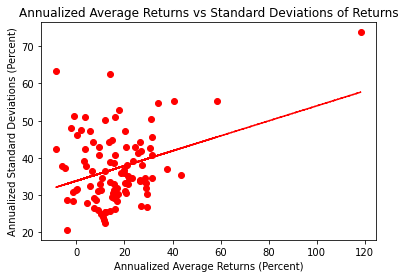

In [13]:
# Create a scatter plot with labels and a title
x = ann_avg_return_2020
y = ann_std_return_2020
plt.scatter(x, y, c='red')
plt.xlabel('Annualized Average Returns (Percent)')
plt.ylabel('Annualized Standard Deviations (Percent)')
plt.title('Annualized Average Returns vs Standard Deviations of Returns')

# calculate the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

## Discussion on Outliers:
In this graph, we can see that there are some outliers, notably one at approximately (120,75) and two near (0, 65). For the first outlier, we see that the mean return is quite high as well as the standard deviation. This demonstrates that this stock generally returns in a very volatile manner, with the volatility ocurring around a 120% return. For the second set of outliers, these stocks return around a mean return of 0% with a high standard deviation or volatility. This means that there is strong possibility that the return could be either positive or negative. 

# Repeat the exercise above (question 5) with 100 random portfolios of 2, 5, 10, and 25 stocks.

In [14]:
def portfolio(a): #method for simplifying the call of 100 random portfolios with varying amounts of stocks denoted as var a
    for x in range(100): #100 random portfolios 
        df = pd.DataFrame(returns_2020) #storing sp100 stocks to a df
        df = df.sample(n=a,axis='columns') #selecting 'a' amount of random stocks from the df
        df = df.dropna() #dropping rows with null values 
        ann_pre_avg2_return = df.mean(axis=0) *252 #mean calculation
        ann_pre_std2_return = df.std(axis=0) * math.sqrt(252) #std calculation 
        ann_avg2_return = ann_pre_avg2_return.mean() #aggregated mean
        ann_std2_return = ann_pre_std2_return.mean() #aggregated std 
        plt.scatter(ann_avg2_return, ann_std2_return, c='red') #scatterplot
    #Creates the labels and titles of the graph
    plt.xlabel('Annualized Average Returns 2020 (Percent)')
    plt.ylabel('Annualized Standard Deviations of Returns 2020 (Percent)')
    plt.title('Annualized Average Returns vs Standard Deviations of Returns (100 portfolios of ' +str(a)+' random stocks)')
    #Defines the limits of the plots
    plt.xlim(-5, 60)
    plt.ylim(20,70)

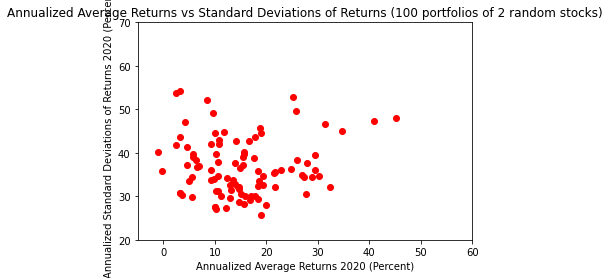

In [15]:
portfolio(2)

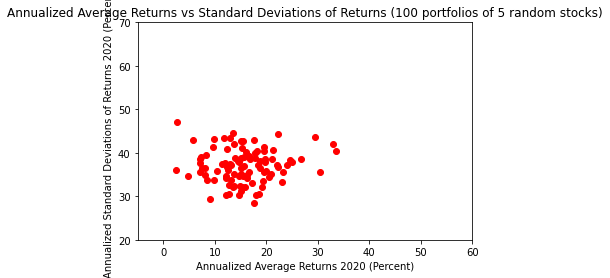

In [16]:
portfolio(5)

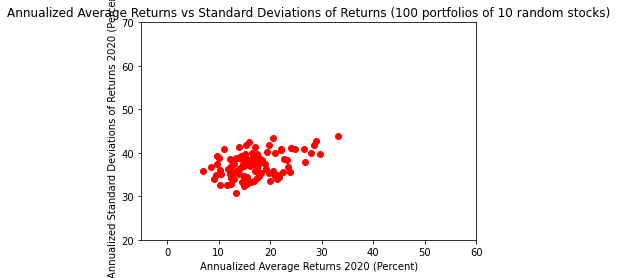

In [17]:
portfolio(10)

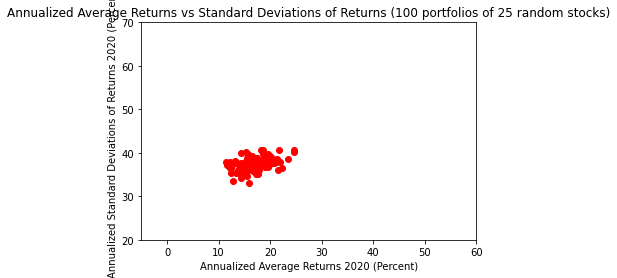

In [18]:
portfolio(25)

# Question 6 Discussion
As we can see per the graphs above, it appears that as we increase the number of different stocks, both the average returns and the standard deviations become much more congested. This makes sense, as the more diversification of ones portfolio should lead to a lower standard deviation for the overall portfolio which would also lead to a more clustered average return.